# Day - 26 DIY

**Q1. Problem Statement: Sampling Distribution-I**

A wine can be labeled as quality "7" and above only if the alcohol level is greater than 11.3%. If the level of alcohol is high, then the will taste sour enough; if the alcohol level is less than 11.3%, the wine might taste bitter. The quality controlperson is only allowed to open ten bottles froma batch of wine with quality "7" & "8"to ensure the levels are sufficient. Load  the “winequality-red.csv”data  into  a  DataFrame  and [erform  following tasks:

1.Pick   up   a   sample   of   ten   bottles   from   "7"   and   "8"   quality   using numpy.random()function

2.Find out the mean and standard deviation of the sample

3.Plot the alcohol content available in the sample using a distplot

4.Calculate   the   standard   error   using   formula -standard_error  = s/np.sqrt(n), Where,s  =  standard  deviation  of  the  sample,  and  n  = sample size


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load the data
df= pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#filter the data for"7' and "8" quality wines
df_filtered=df[(df["quality"] ==7) | (df["quality"]==8)]

#randomly sample 10 bottles
sample= df_filtered.sample(n=10, replace=True)
sample = sample.reset_index(drop=True)
alcohol_values =sample["alcohol"]
print("Alcohol\n",alcohol_values)

Alcohol
 0    13.4
1    12.2
2    12.4
3    11.3
4    11.7
5    11.2
6    11.7
7    10.6
8    11.3
9    11.5
Name: alcohol, dtype: float64


In [5]:
# finding the mean and standard deviation of the data
mean_alcohol= sample["alcohol"].mean()
std_alcohol= sample["alcohol"].std()
print("Mean of sample is:", mean_alcohol)
print("The Standard Deviation of the Sample:", std_alcohol)

Mean of sample is: 11.73
The Standard Deviation of the Sample: 0.7775317071062476


C:\Users\sravy\AppData\Local\Temp\ipykernel_13688\3513286741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample["alcohol"], hist=False)


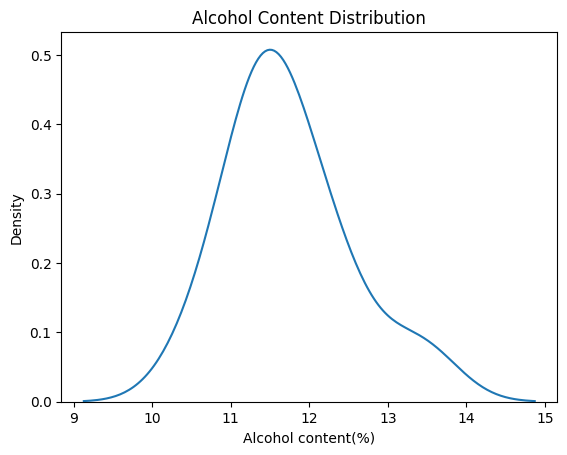

In [6]:
#plot the alcohol content distribution
sns.distplot(sample["alcohol"], hist=False)
plt.title("Alcohol Content Distribution")
plt.xlabel("Alcohol content(%)")
plt.ylabel("Density")
plt.show()

In [7]:
#Calculate the standard error
standard_error = std_alcohol/np.sqrt(len(sample))
print("Standard Error:", standard_error)

Standard Error: 0.24587711474546703


**Q2. Problem Statement: Sampling Distribution-II**

Note:This problem is in continuation with the previous one.Our goal was to get a mean of 11.3, but we got 11.65 for our samples. Since this is a sample and we do not expect it to be precisely 11.3, it is 11.65. Does this batch  of  the  sample  accurately  reflect  the  alcohol  content  of  the  entire population? To answer these questions, perform the following tasks:

1.Take nine samples of size ten each from the population and find the means and standard deviations of all the nine samples

2.Plot the means of the sampling distribution

3.Find the standard error of the sampling distribution

In [8]:
seed = np.arange(0, 9)

x_bar = []
std_dev = []

for s in seed:
    np.random.seed(s)
    sample_7_and_above = df[df['quality'].isin([7, 8])].sample(10)[['alcohol']].reset_index().drop(columns = ['index'])
    x_bar.append(np.mean(sample_7_and_above["alcohol"]))
    std_dev.append(np.std(sample_7_and_above["alcohol"]))
    
samples = pd.DataFrame(columns = ["Sample Means (X_bar)", "Sample Standard Deviation (s)"], data= list(zip(x_bar, std_dev)))
samples

,Sample Means (X_bar),Sample Standard Deviation (s)
0,11.02,0.669029
1,11.14,0.971802
2,11.21,1.013361
3,11.63,0.888876
4,11.45,0.908020
5,11.24,0.935094
6,11.32,1.231909
7,11.39,0.773886
8,11.30,0.507937


In [9]:
#create nine samples of size 10 each 
sample_means =[]
sample_stds =[]
for i in range(9):
     sample=df_filtered.sample(n=10, replace=True)
     sample_means.append(sample["alcohol"].mean())
     sample_stds.append(sample["alcohol"].std())
print(f"Sample Means (X_bar),{sample_means}")
print(f"Sample Standard Deviation(s), {sample_stds}")

Sample Means (X_bar),[np.float64(11.91), np.float64(11.16), np.float64(11.989999999999998), np.float64(11.41), np.float64(11.08), np.float64(11.47), np.float64(11.620000000000001), np.float64(11.9), np.float64(11.93)]
Sample Standard Deviation(s), [np.float64(1.2151360234786703), np.float64(0.7089898917944224), np.float64(1.1675710780171897), np.float64(0.9515484456634066), np.float64(0.9542885657214315), np.float64(1.0285372569279585), np.float64(0.5731007280089991), np.float64(1.2762793146051097), np.float64(0.9603818684946801)]


C:\Users\sravy\AppData\Local\Temp\ipykernel_13688\89829675.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means,)


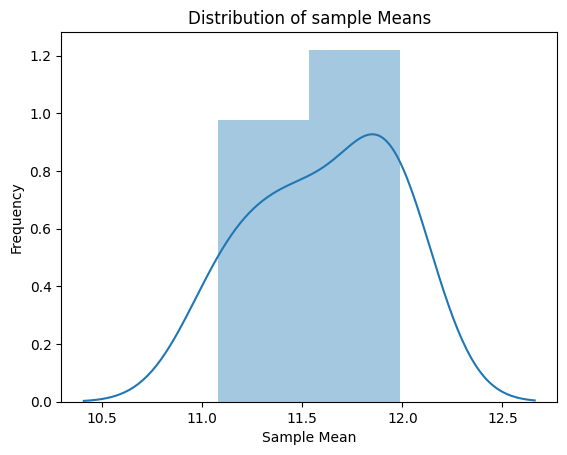

In [10]:
#plot the histogram of the sample means
sns.distplot(sample_means,)
plt.title("Distribution of sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [24]:
#calculating the standard error of the samplying distribution
standard_error = np.std(sample_means)
print("Standard Error of the Sampling Distribution:", standard_error)

Standard Error of the Sampling Distribution: 0.28333454369143485
